In [1]:

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [2]:
df = pd.read_csv("diabetes.csv")



In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
457,5,86,68,28,71,30.2,0.364,24,0
761,9,170,74,31,0,44.0,0.403,43,1
326,1,122,64,32,156,35.1,0.692,30,1
765,5,121,72,23,112,26.2,0.245,30,0
652,5,123,74,40,77,34.1,0.269,28,0
622,6,183,94,0,0,40.8,1.461,45,0
625,4,90,88,47,54,37.7,0.362,29,0
666,4,145,82,18,0,32.5,0.235,70,1
647,0,179,50,36,159,37.8,0.455,22,1
98,6,93,50,30,64,28.7,0.356,23,0


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
cols = ['Insulin','Glucose','BloodPressure','SkinThickness','BMI']
df[cols] = df[cols].replace(0,np.nan)


In [4]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [6]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
!pip install missingno


Defaulting to user installation because normal site-packages is not writeable


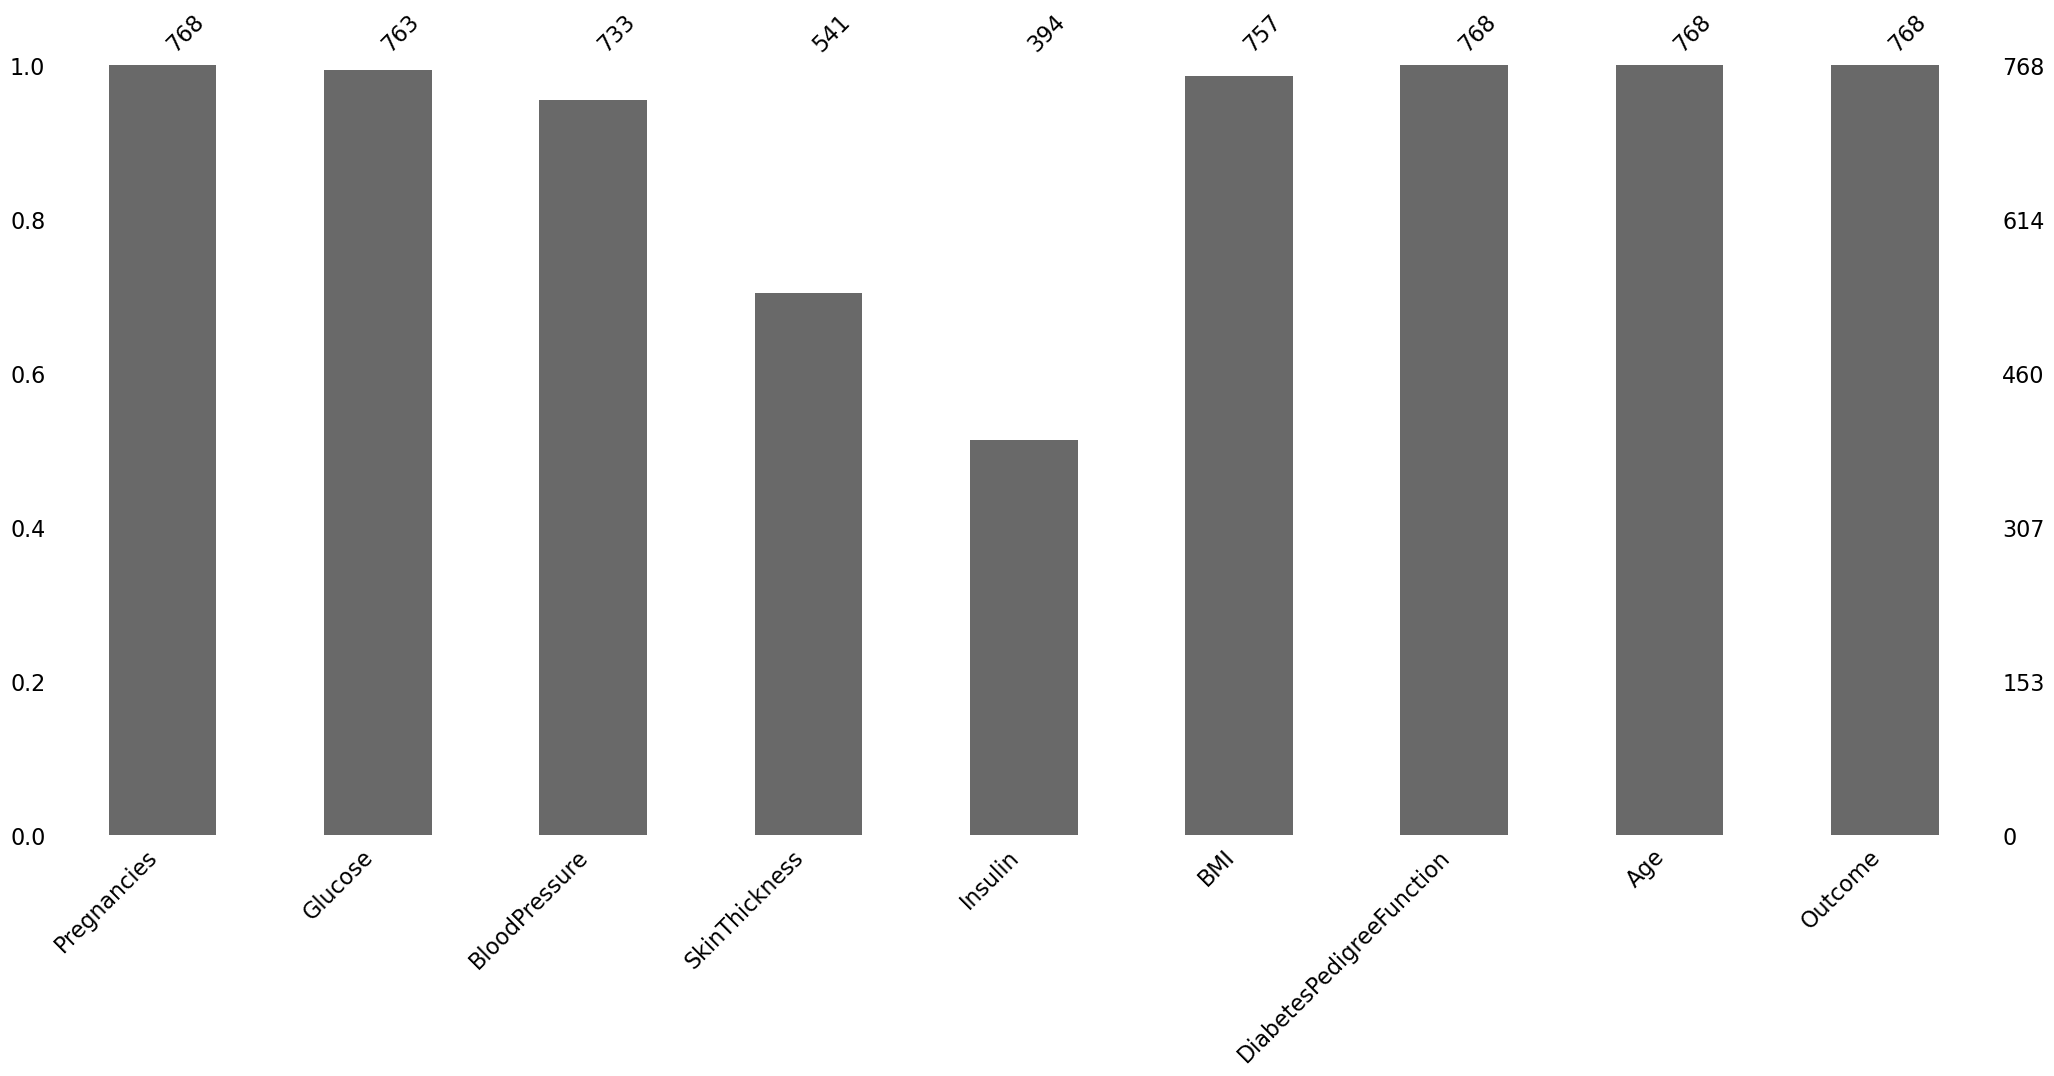

In [8]:
import missingno as msno
msno.bar(df);


<Axes: >

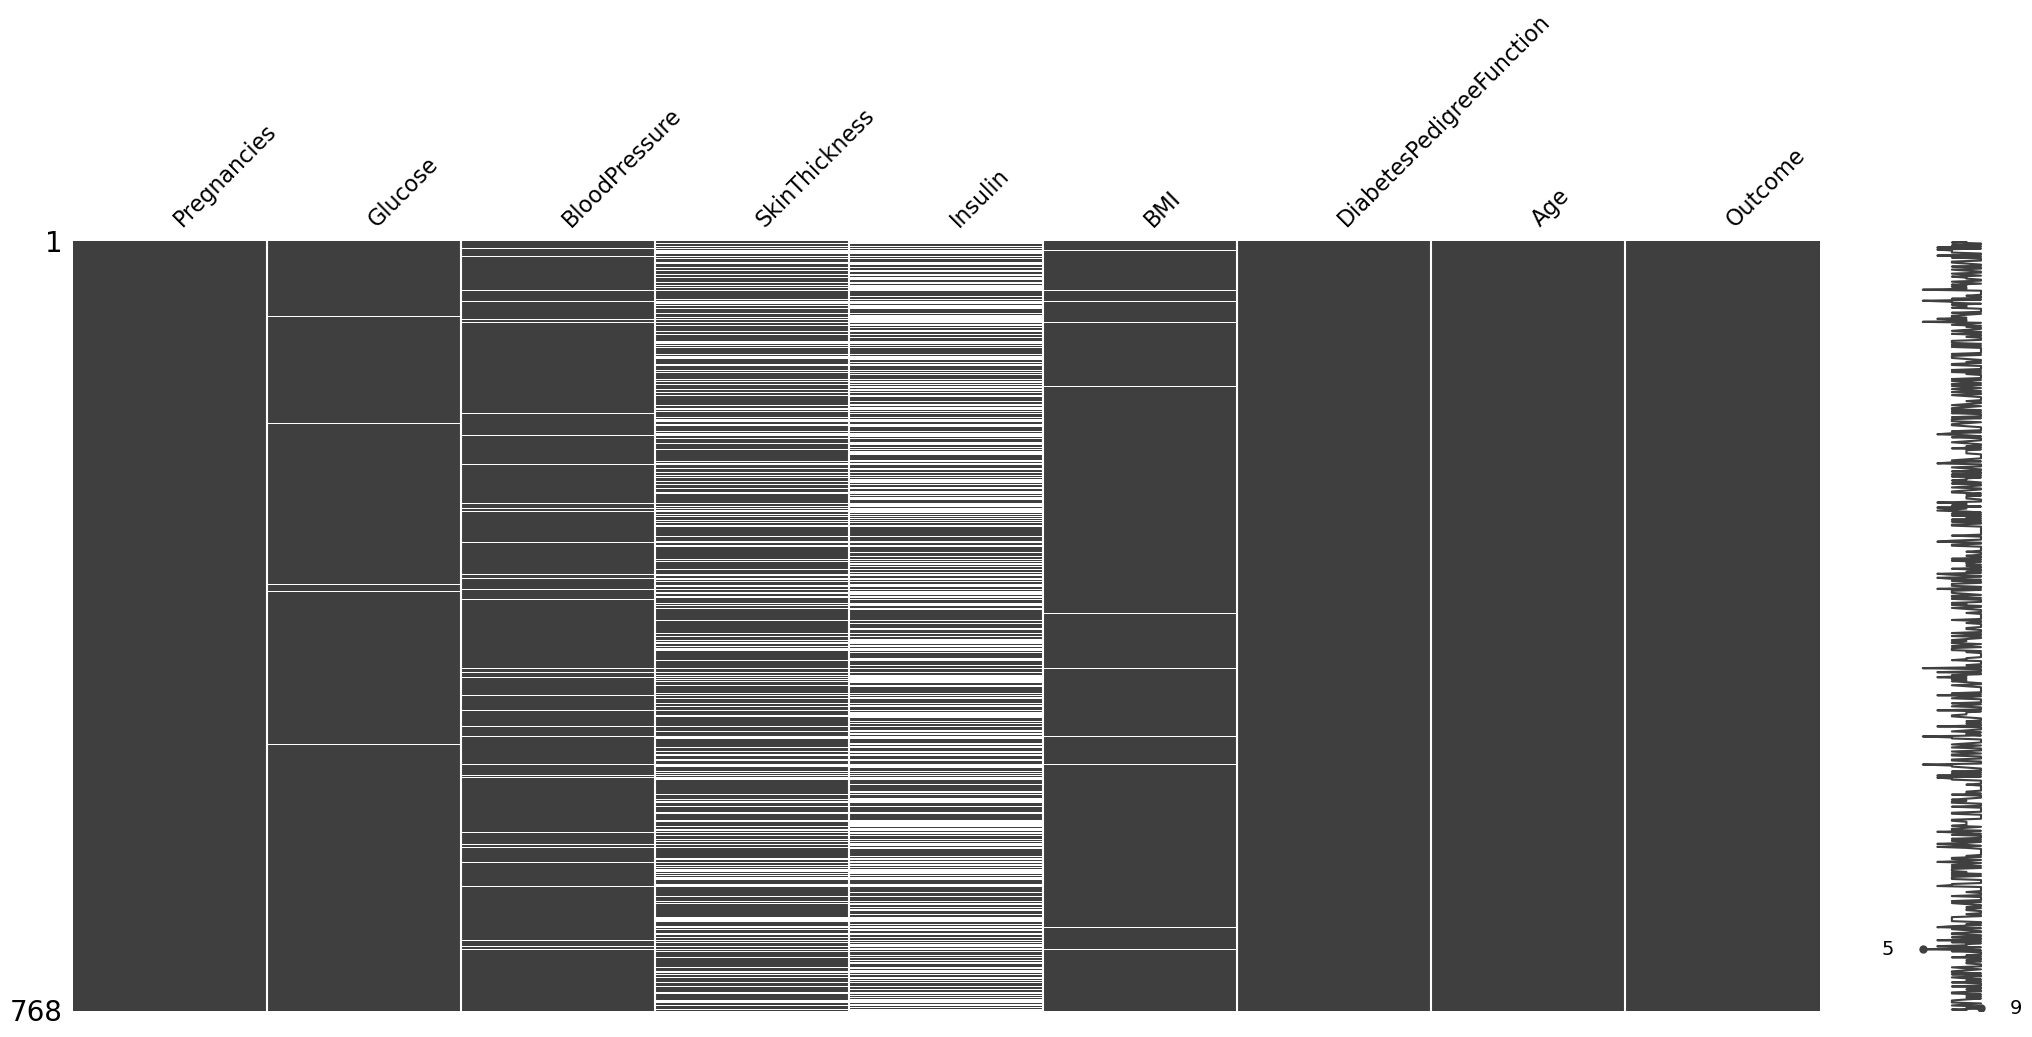

In [9]:
msno.matrix(df)

In [10]:
#remplacer les valeurs manquntes par la médian
columns = df.columns
columns = columns.drop("Outcome")
for col in  columns :
  median = df[col].median()
  df[col] = df[col].fillna(median)


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

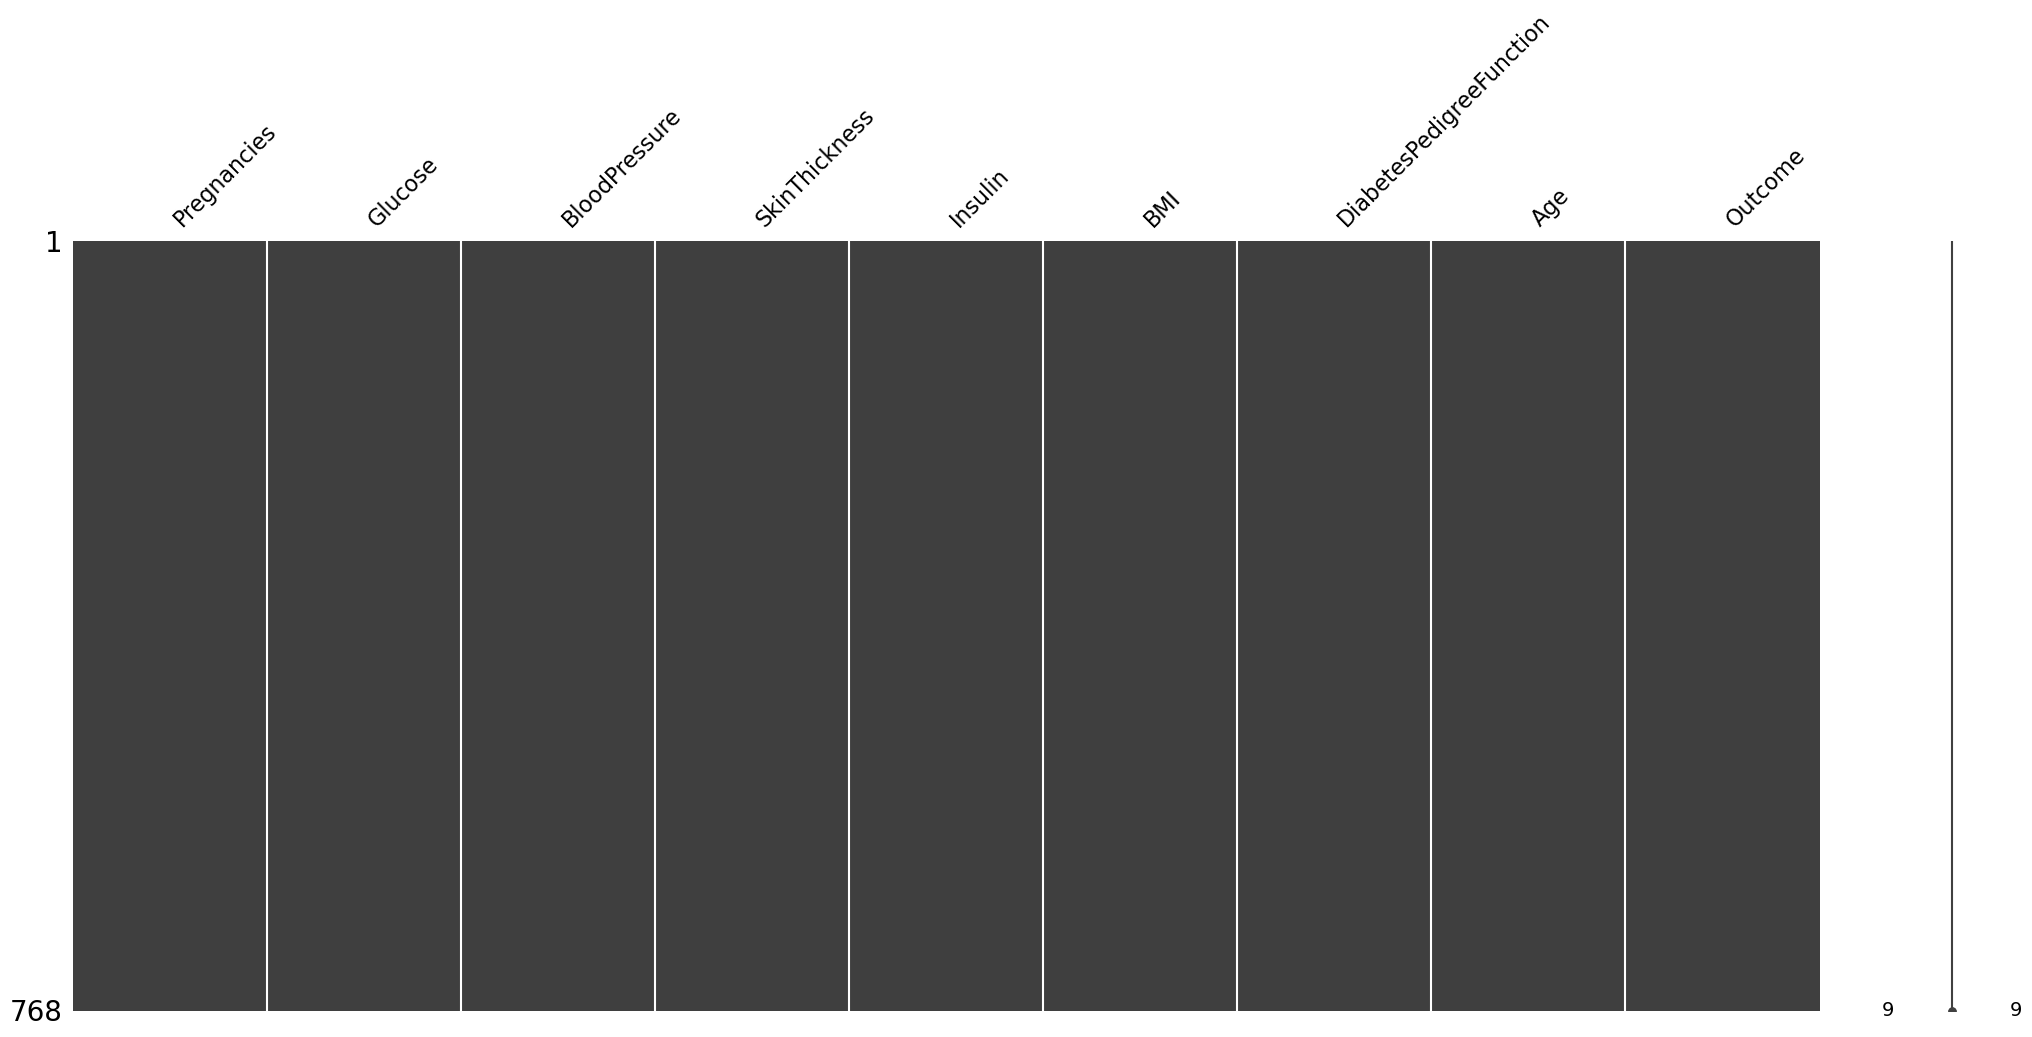

In [13]:
msno.matrix(df)

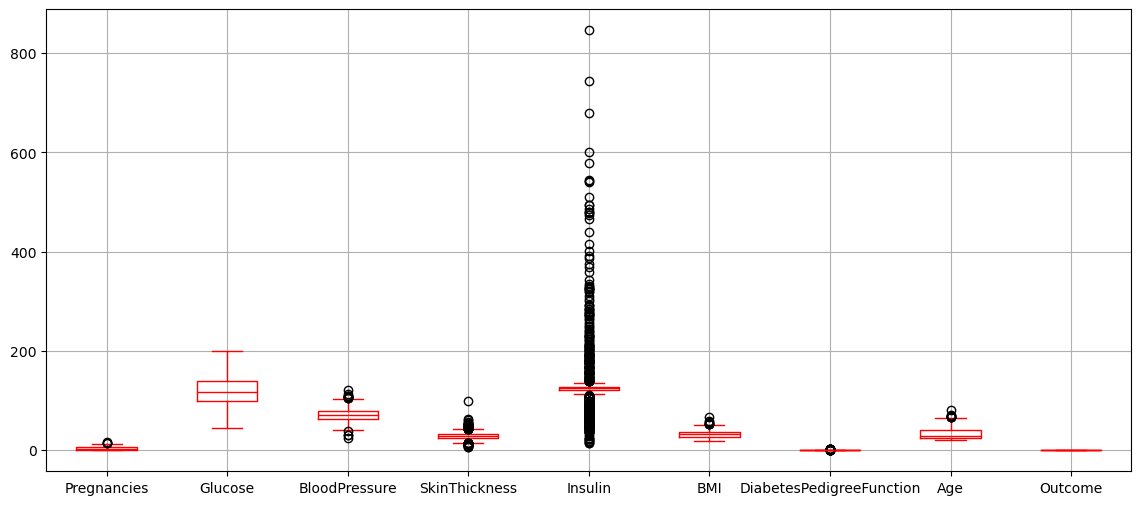

In [14]:
df.boxplot(figsize=(14,6), color ='red')
plt.show()


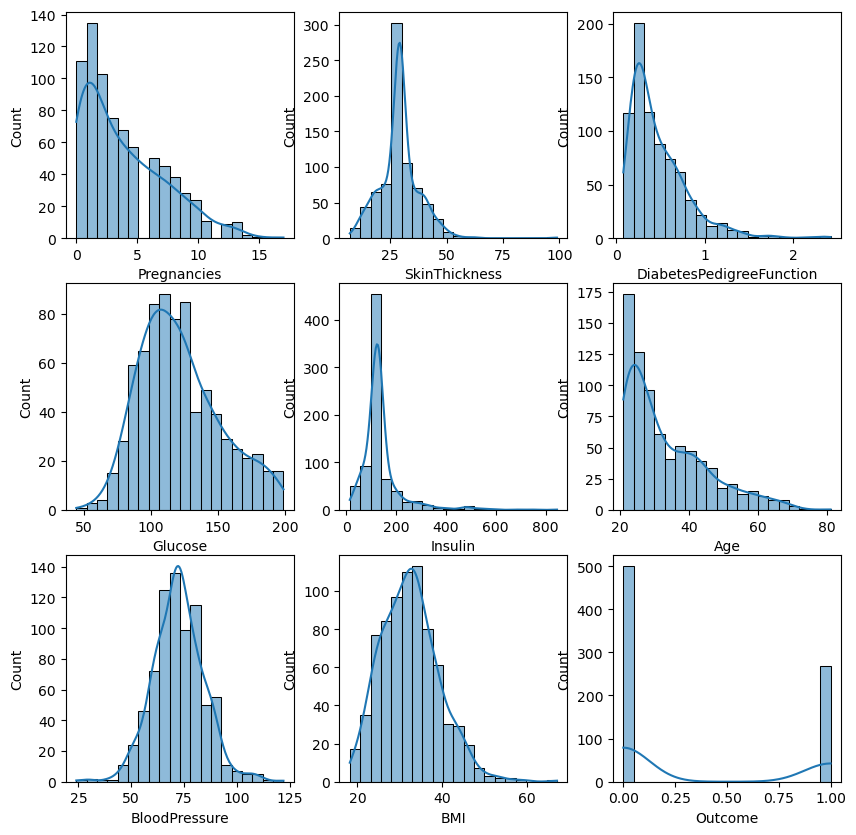

In [15]:
cols = df.columns
fige , ax = plt.subplots(3,3,figsize = (10 ,10))
col_index  = 0
row_index  = 0
for col in cols :
    sns.histplot(df[col],bins = 20, ax = ax[col_index,row_index], kde = 'True')
    col_index = col_index + 1
    if( col_index == 3):
      col_index = 0
      row_index = row_index +1
    
    




<Axes: ylabel='Outcome'>

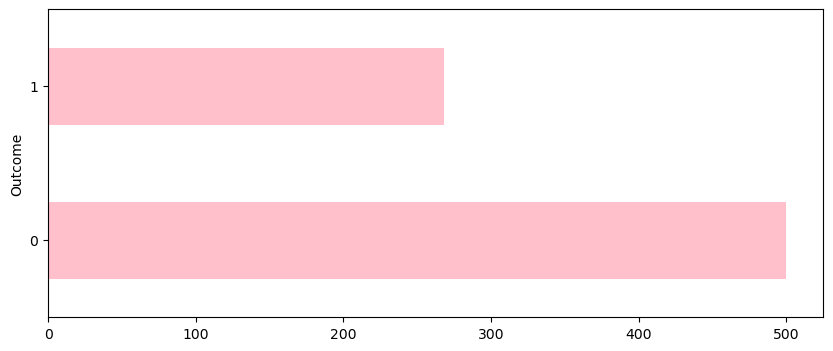

In [16]:
df["Outcome"].value_counts().plot.barh(figsize = (10,4) ,  color ='pink')

In [17]:
pd.crosstab(df['Age'] , df['Outcome'] ,normalize = 'index') *100

Outcome,0,1
Age,,
21,92.063492,7.936508
22,84.722222,15.277778
23,81.578947,18.421053
24,82.608696,17.391304
25,70.833333,29.166667
26,75.757576,24.242424
27,75.000000,25.000000
28,71.428571,28.571429
29,55.172414,44.827586


In [18]:
df_clean = df.copy()
for col in df_clean.select_dtypes(include='number').columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


In [19]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.0,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [16]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,332.000000,332.000000,332.000000,332.000000,332.0,332.000000,332.000000,332.000000,332.000000
mean,4.361446,118.762048,73.566265,28.933735,125.0,31.383434,0.367702,35.376506,0.346386
std,3.348186,29.193707,10.228735,4.219986,0.0,6.061731,0.215653,12.340332,0.476536
min,0.000000,44.000000,48.000000,15.000000,125.0,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,68.000000,29.000000,125.0,27.075000,0.205750,25.000000,0.000000
50%,4.000000,114.000000,72.000000,29.000000,125.0,31.400000,0.291000,32.000000,0.000000
75%,7.000000,135.250000,80.000000,29.000000,125.0,35.125000,0.501500,42.000000,1.000000
max,13.000000,196.000000,104.000000,42.000000,125.0,47.900000,1.022000,68.000000,1.000000


In [81]:
pd.crosstab(df_clean['Age'] , df_clean['Outcome'] ,normalize = 'index') *100

Outcome,0,1
Age,,
21,92.727273,7.272727
22,88.524590,11.475410
23,81.818182,18.181818
24,82.926829,17.073171
25,80.000000,20.000000
26,85.714286,14.285714
27,79.310345,20.689655
28,76.666667,23.333333
29,57.692308,42.307692


In [82]:
cols = ['Insulin','SkinThickness']
df_clean[cols] = df_clean[cols].replace(0,np.nan)

In [83]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
5,5,116,74,NaN,NaN,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,NaN,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,NaN,NaN,30.1,0.349,47,1


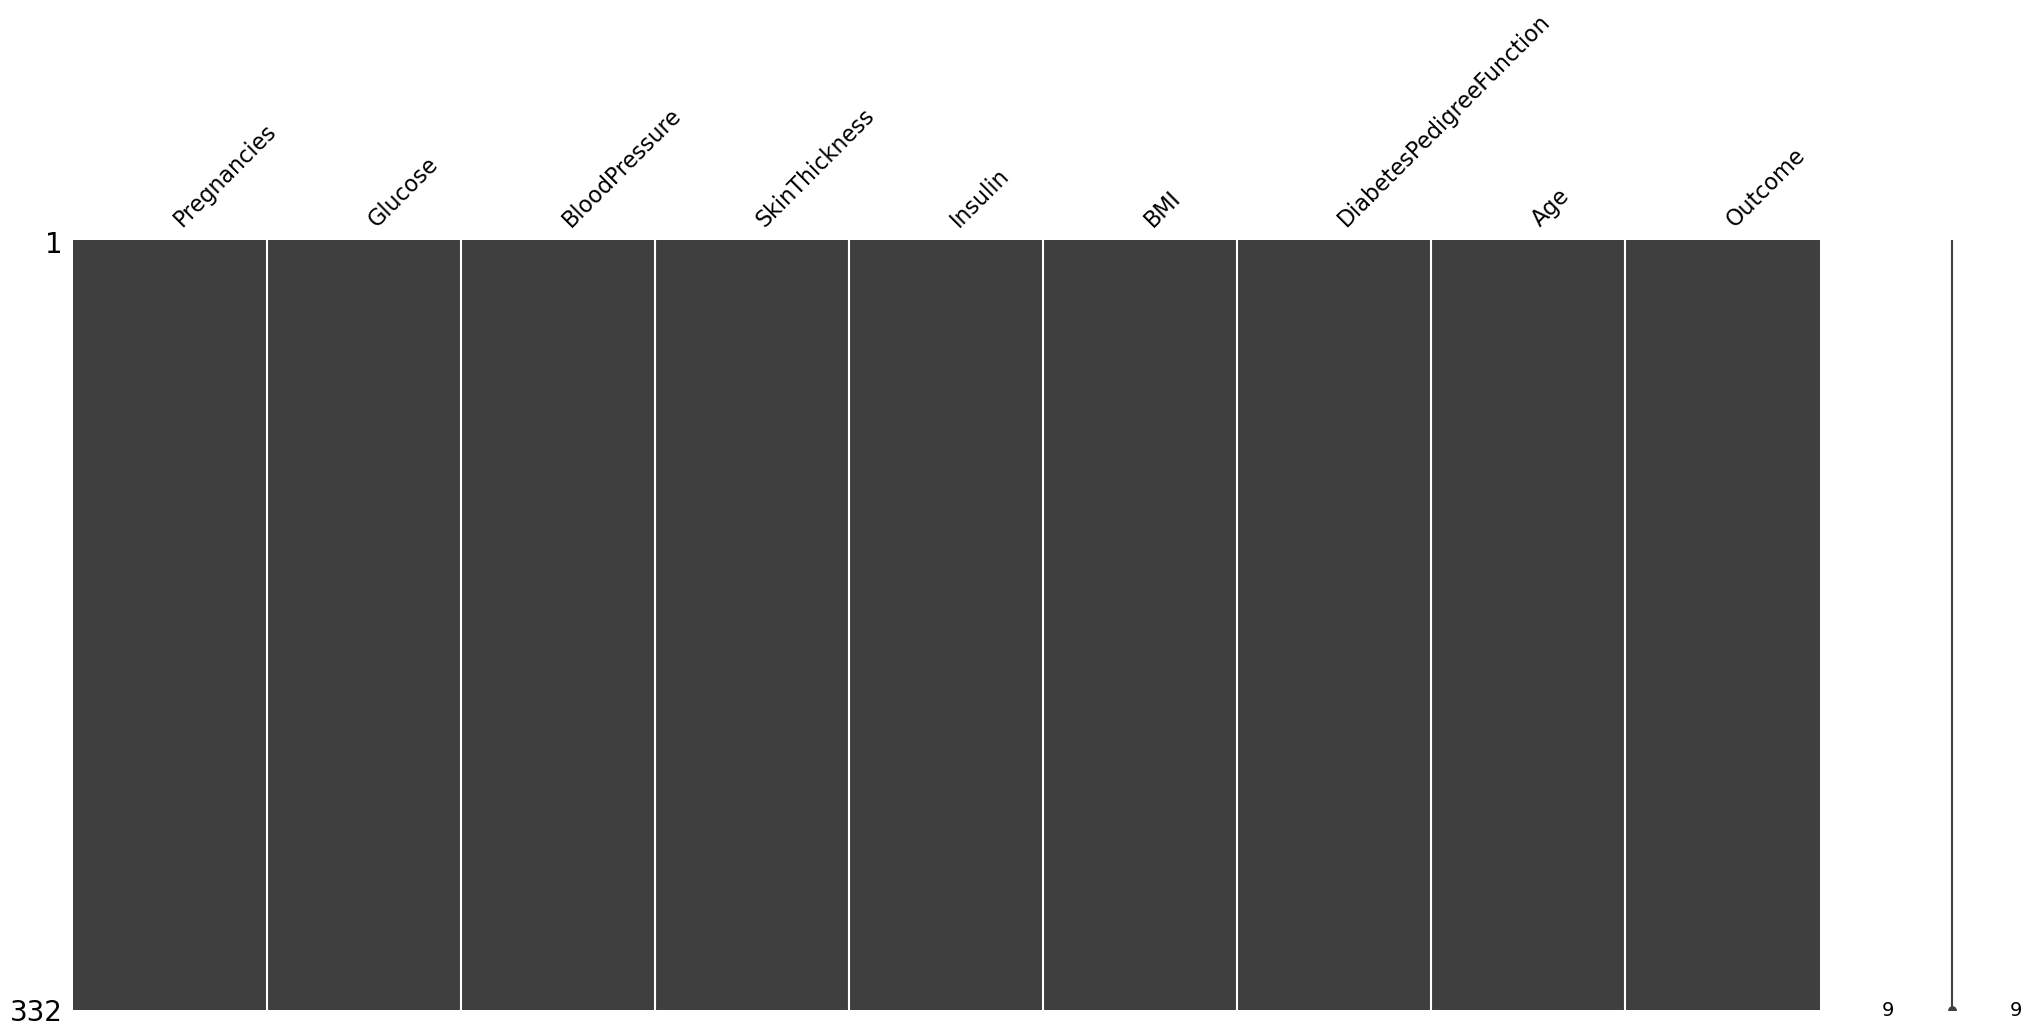

In [20]:
msno.matrix(df_clean)
plt.show()



In [21]:

columns = df_clean.columns
columns = columns.drop("Outcome")
for col in  columns :
  median = df_clean[col].median()
  df_clean[col] = df_clean[col].fillna(median)

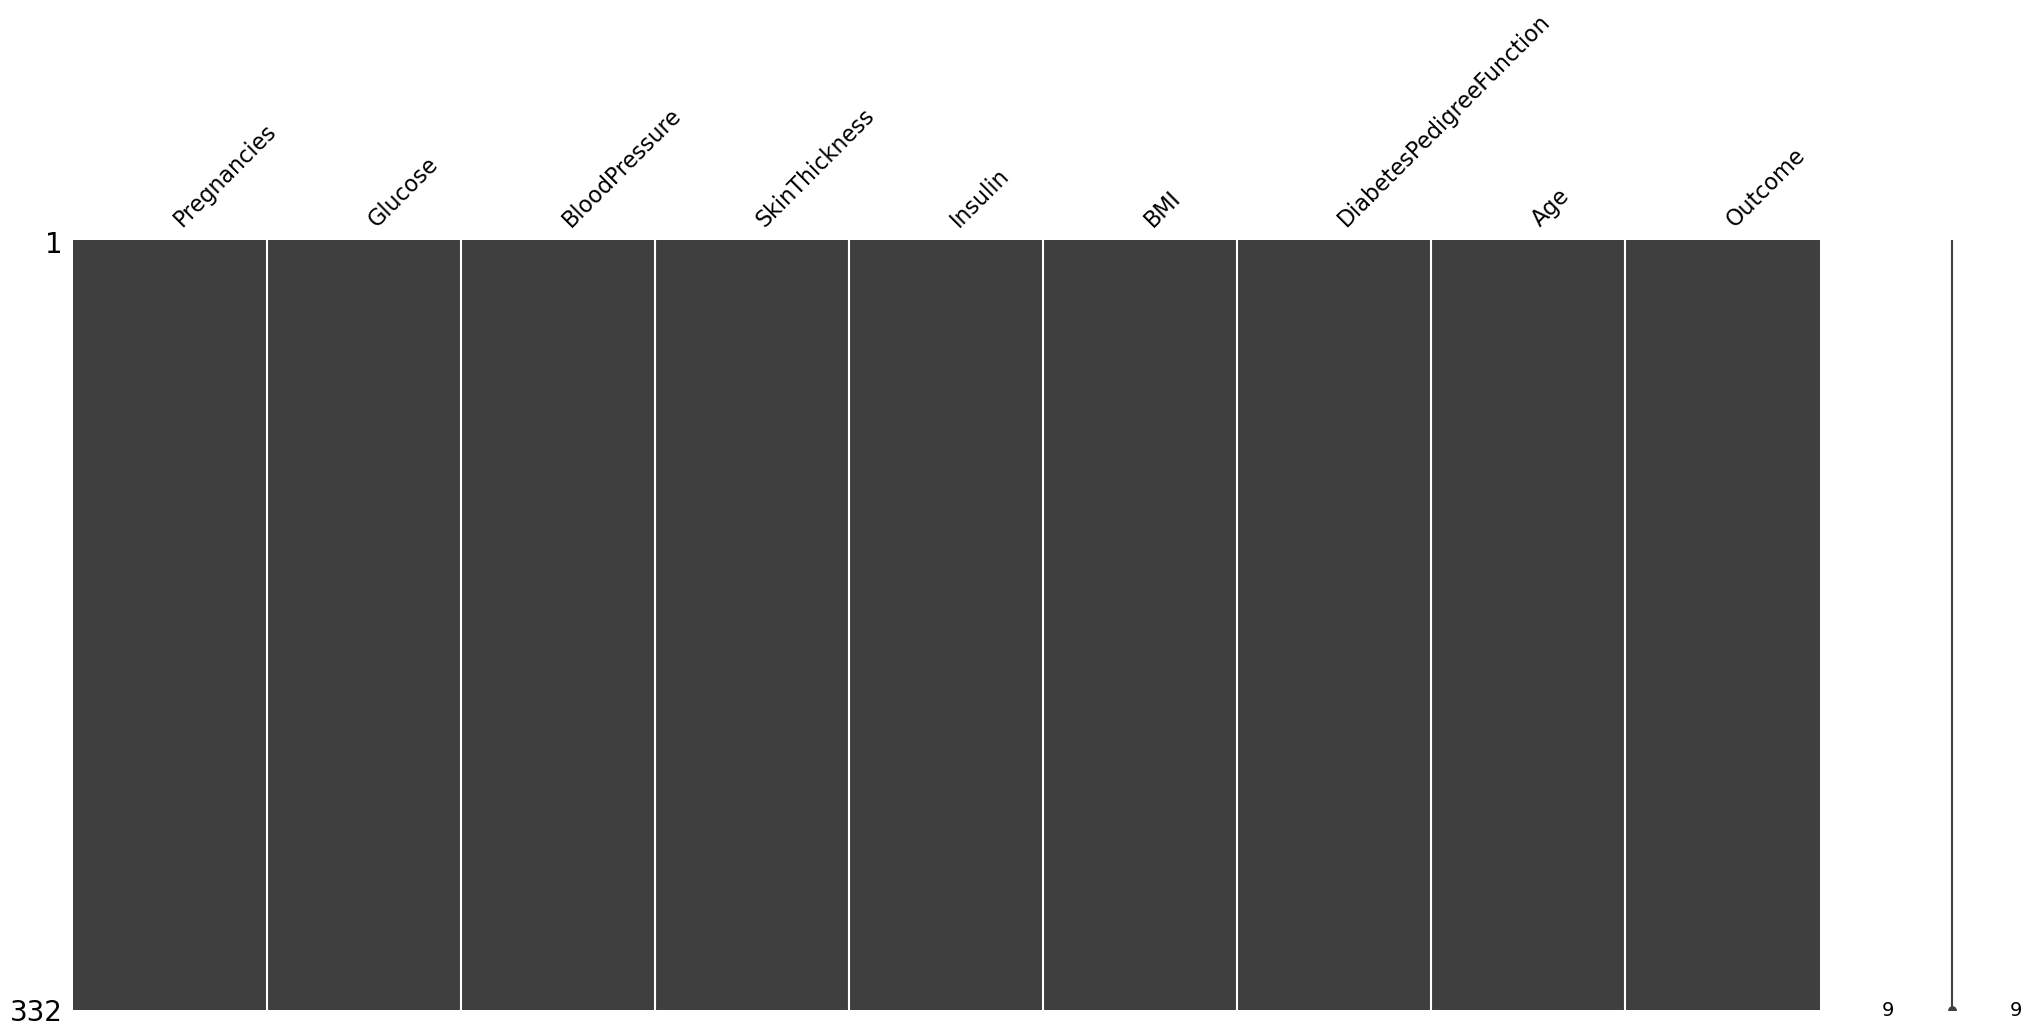

In [22]:
msno.matrix(df_clean)
plt.show()

In [23]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,332.000000,332.000000,332.000000,332.000000,332.0,332.000000,332.000000,332.000000,332.000000
mean,4.361446,118.762048,73.566265,28.933735,125.0,31.383434,0.367702,35.376506,0.346386
std,3.348186,29.193707,10.228735,4.219986,0.0,6.061731,0.215653,12.340332,0.476536
min,0.000000,44.000000,48.000000,15.000000,125.0,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,68.000000,29.000000,125.0,27.075000,0.205750,25.000000,0.000000
50%,4.000000,114.000000,72.000000,29.000000,125.0,31.400000,0.291000,32.000000,0.000000
75%,7.000000,135.250000,80.000000,29.000000,125.0,35.125000,0.501500,42.000000,1.000000
max,13.000000,196.000000,104.000000,42.000000,125.0,47.900000,1.022000,68.000000,1.000000


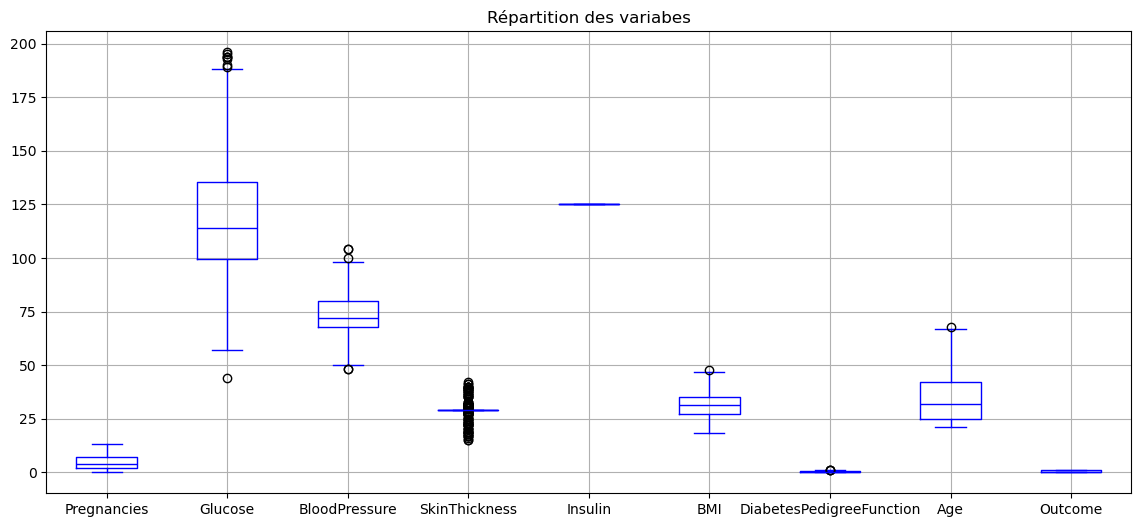

In [24]:
df_clean.boxplot(figsize =(14,6), color = 'blue')
plt.title('Répartition des variabes')
plt.show()               

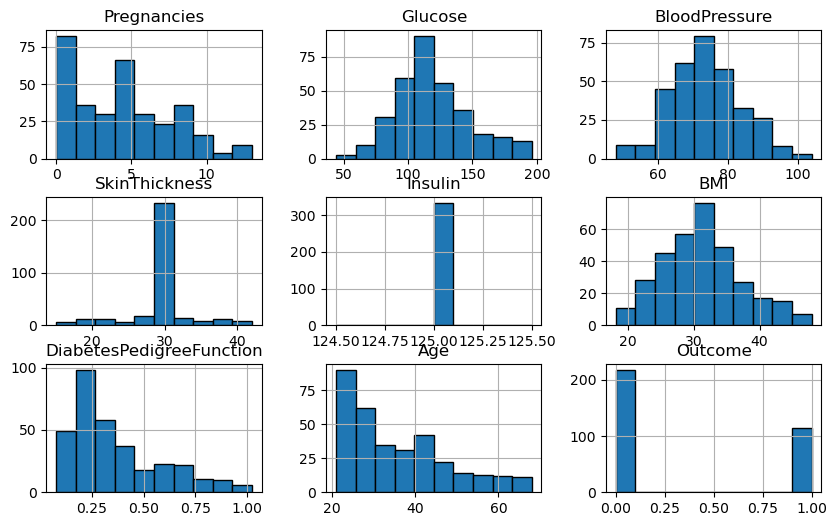

In [26]:
df_clean.hist(figsize = (10,6) , edgecolor ='black')
plt.show()

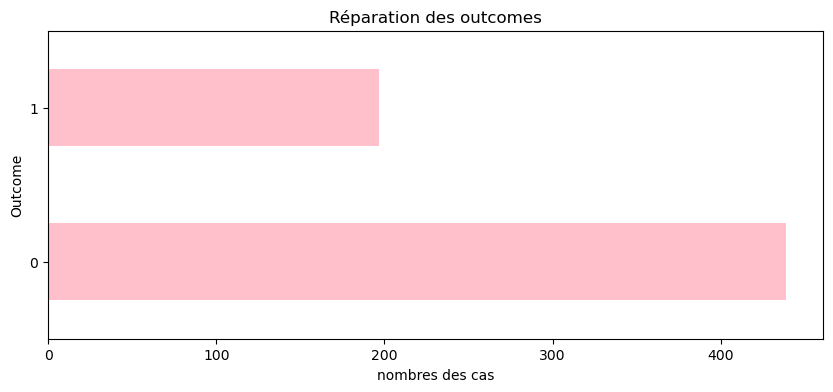

In [87]:
df_clean["Outcome"].value_counts().plot.barh(figsize = (10,4) ,  color ='pink')
plt.title('Réparation des outcomes')
plt.xlabel('nombres des cas')
plt.show()

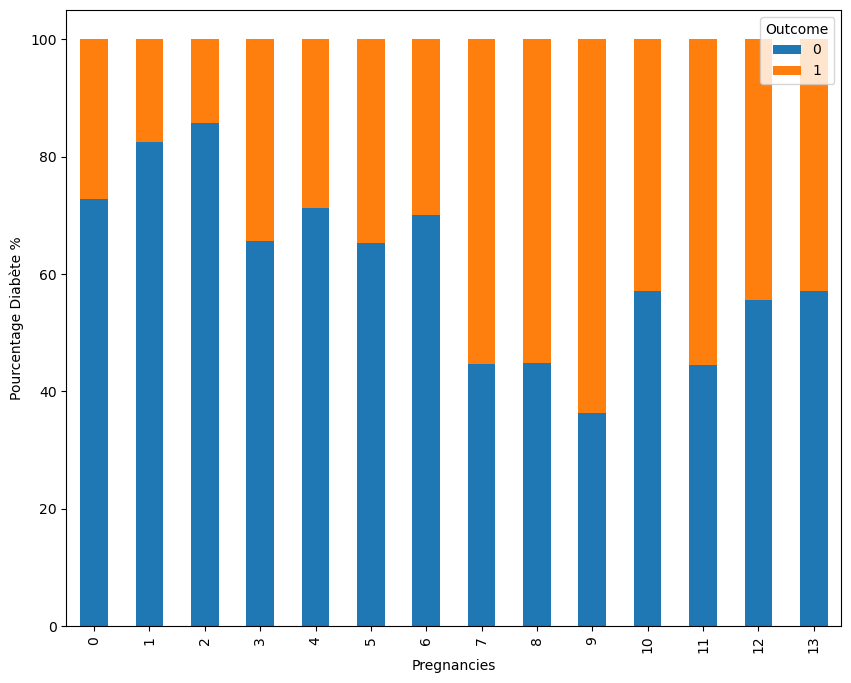

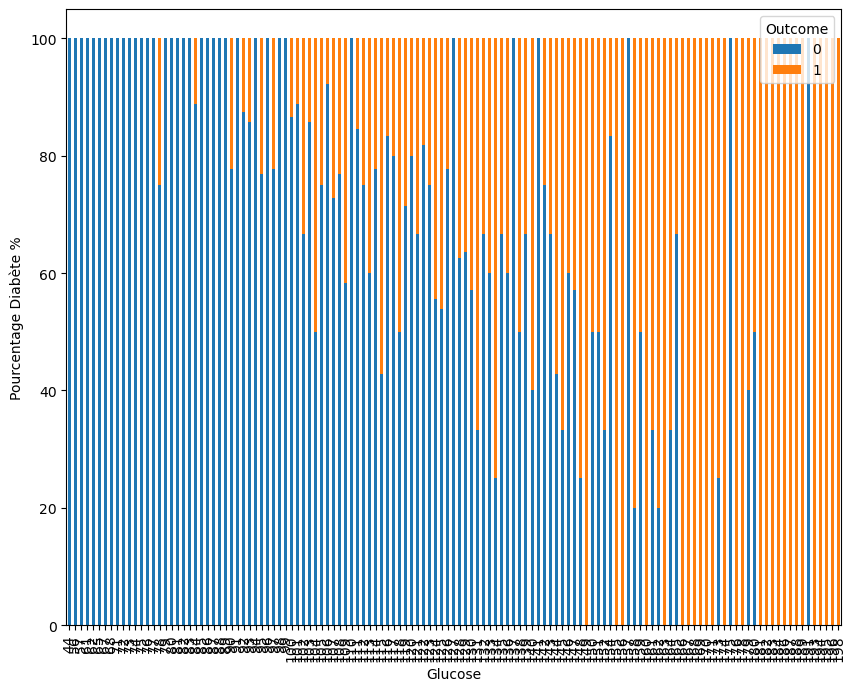

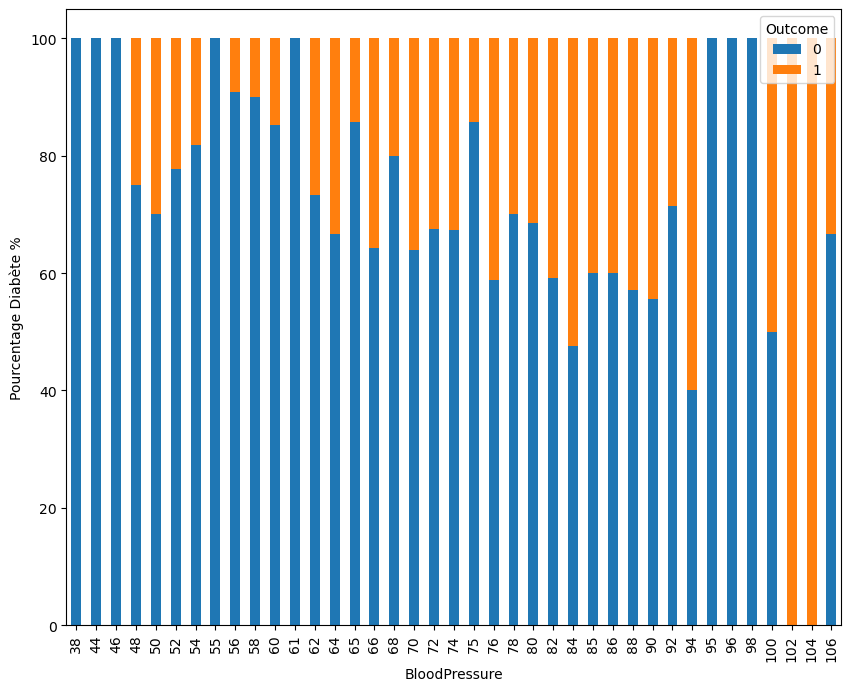

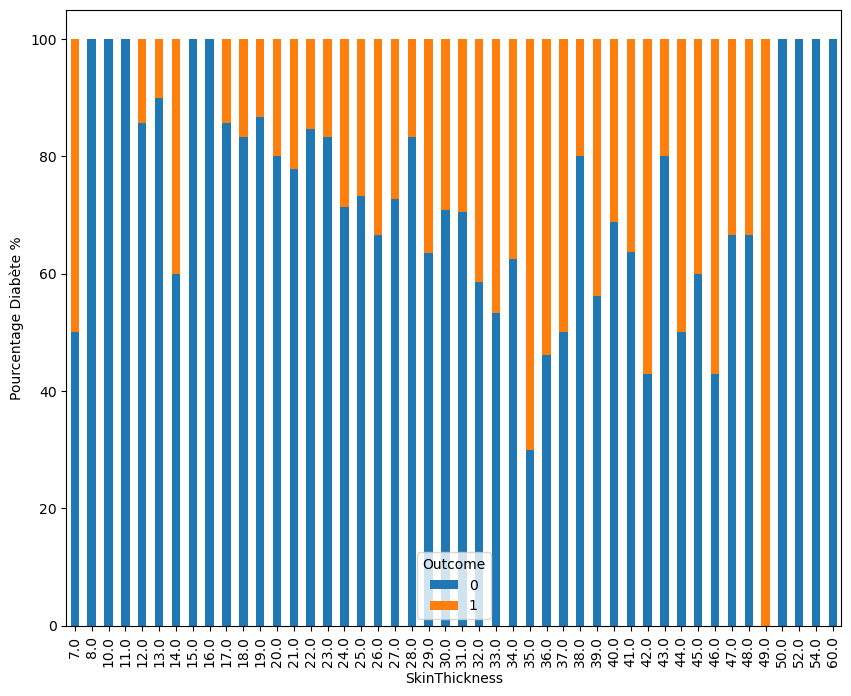

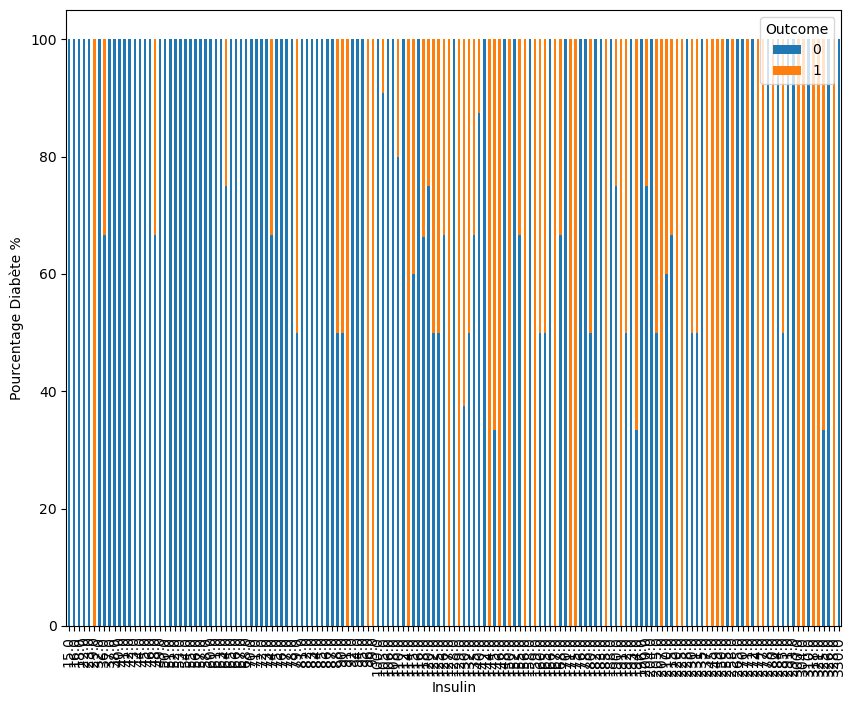

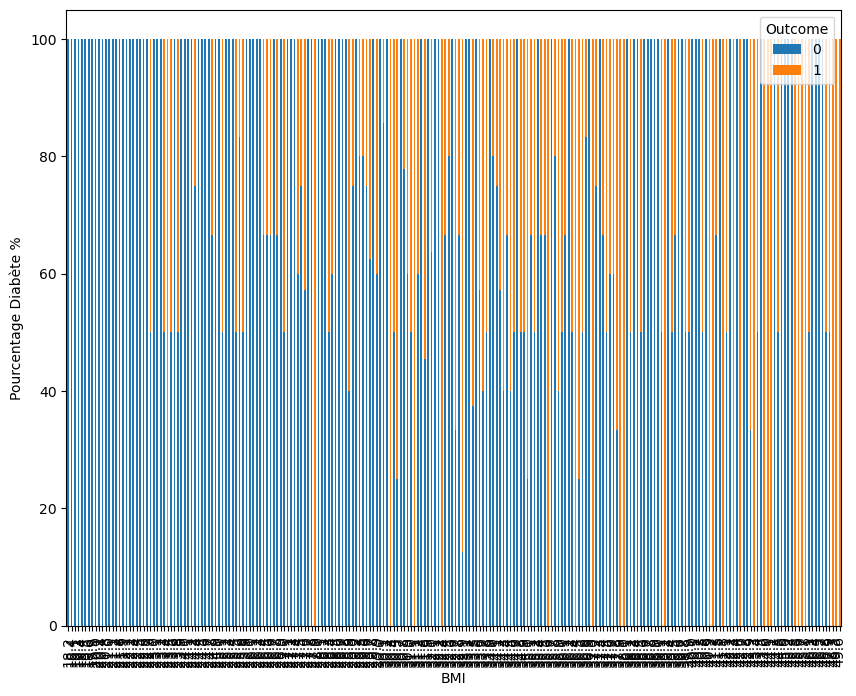

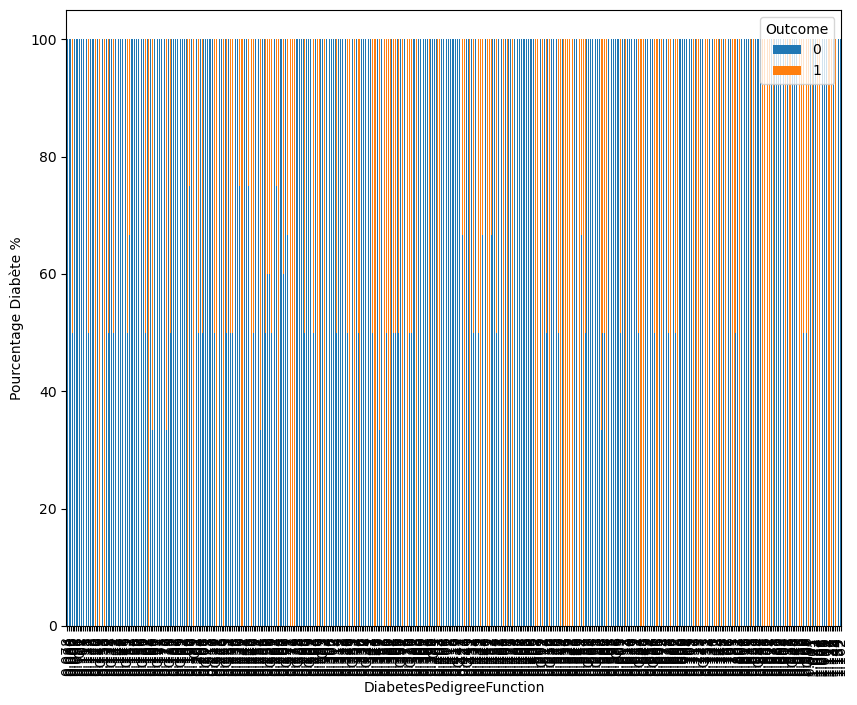

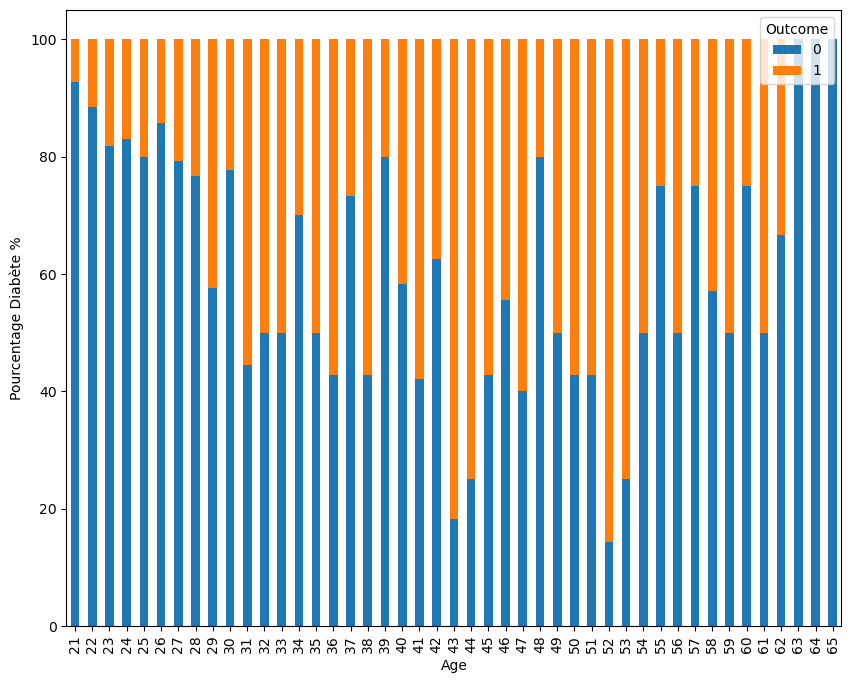

In [88]:
for i in df_clean.columns:
    if i != 'Outcome':
        (pd.crosstab(df_clean[i], df_clean['Outcome'], normalize='index') * 100) \
            .plot(kind='bar', figsize=(10, 8), stacked=True)
        plt.ylabel('Pourcentage Diabète %')
        plt.show()


In [24]:
df_clean.groupby(['Outcome']) [df_clean.columns].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,,,,,,,,,
0,3.273349,109.293850,70.712984,27.578588,116.091116,30.817768,0.398658,30.610478,0.0
1,4.928934,140.208122,74.893401,30.984772,143.812183,34.518782,0.487695,36.888325,1.0


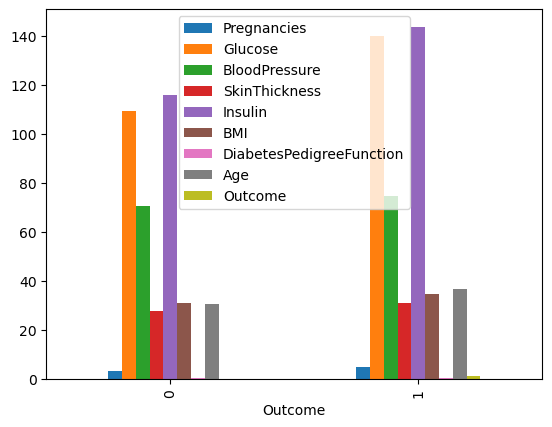

In [89]:
df_clean.groupby(['Outcome'])[df_clean.columns].mean().plot.bar()
plt.show()

In [35]:
y = df_clean['Outcome']
X =df_clean.drop(columns = ['Outcome'])

In [36]:
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 234)

In [37]:
y_train


600    0
183    0
426    0
664    1
321    1
      ..
725    0
5      0
363    1
435    1
757    1
Name: Outcome, Length: 232, dtype: int64

In [38]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
600,1,108.0,88.0,19.0,125.0,27.1,0.400,24
183,5,73.0,60.0,29.0,125.0,26.8,0.268,27
426,0,94.0,72.0,29.0,125.0,32.3,0.256,25
664,6,115.0,60.0,39.0,125.0,33.7,0.245,40
321,3,112.0,74.0,30.0,125.0,31.6,0.197,25
...,...,...,...,...,...,...,...,...
725,4,112.0,78.0,40.0,125.0,39.4,0.236,38
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30
363,4,146.0,78.0,29.0,125.0,38.5,0.520,67
435,0,141.0,72.0,29.0,125.0,42.4,0.205,29


In [39]:
#Standardisation   z=  (x−μ)/ σ


from sklearn.preprocessing import StandardScaler



# Scaling  the data  : création de l'objet StandarScaler()
sc = StandardScaler()

# fit transform on train data : fit + transforme   sur les donnés d'entrainments
X_train_Scaled = sc.fit_transform(X_train)
X_train_Scaled = pd.DataFrame(X_train , columns = X.columns)

#tronsfome on ferme data : transforme sur les données de test 
X_test_scaled = sc.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X.columns)

In [144]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
681,0,162,76,36.0,118.0,49.6,0.364,26
11,10,168,74,29.0,118.0,38.0,0.537,34
105,1,126,56,29.0,152.0,28.7,0.801,21
470,1,144,82,40.0,118.0,41.3,0.607,28
304,3,150,76,29.0,118.0,21.0,0.207,37


In [145]:
X_train_Scaled.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
681,0,162,76,36.0,118.0,49.6,0.364,26
11,10,168,74,29.0,118.0,38.0,0.537,34
105,1,126,56,29.0,152.0,28.7,0.801,21
470,1,144,82,40.0,118.0,41.3,0.607,28
304,3,150,76,29.0,118.0,21.0,0.207,37


In [40]:
# Building the model 
model_lgr  = LogisticRegression(max_iter = 1000)

In [41]:
model_lgr.fit(X_train_Scaled , y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_pred_train = model_lgr.predict(X_train_Scaled)
y_pred_test = model_lgr.predict(X_test_scaled)

In [45]:
y_pred_train

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [44]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [149]:
from sklearn import metrics

print('Accuracy' ,metrics.accuracy_score(y_train ,y_pred_train))
print("Precesion" ,metrics.precision_score(y_train , y_pred_train) )
print("recall",metrics.recall_score(y_train , y_pred_train))


Accuracy 0.7842696629213484
Precesion 0.7339449541284404
recall 0.54421768707483


In [150]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       298
           1       0.73      0.54      0.62       147

    accuracy                           0.78       445
   macro avg       0.77      0.72      0.74       445
weighted avg       0.78      0.78      0.77       445



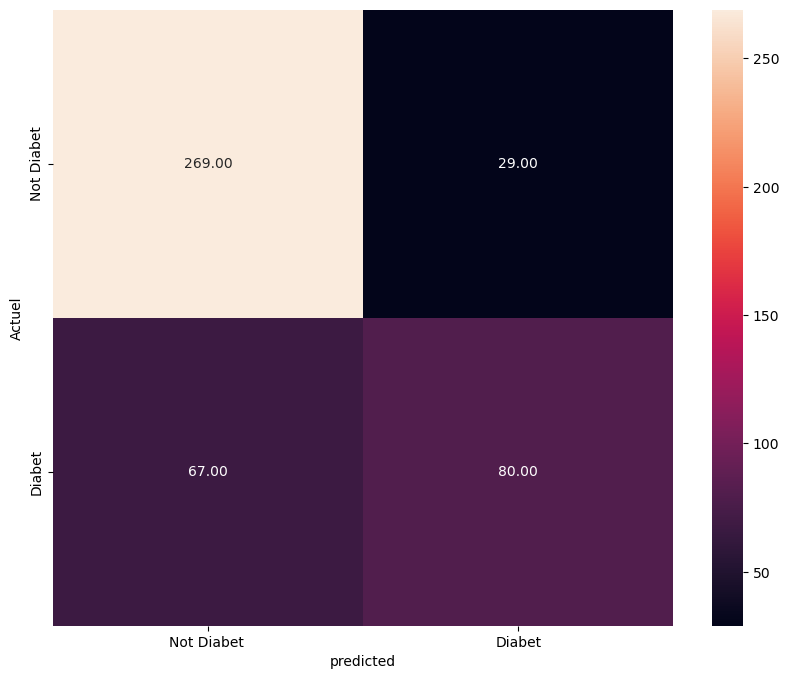

In [111]:
cm= metrics.confusion_matrix(y_train , y_pred_train)
plt.figure(figsize = ( 10 ,8))
sns.heatmap(cm, annot = True , fmt='.2f' ,xticklabels =['Not Diabet ' , 'Diabet'] ,yticklabels = ['Not Diabet' , 'Diabet'])
plt.xlabel('predicted')
plt.ylabel('Actuel')
plt.show()

In [112]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       141
           1       0.00      0.00      0.00        50

    accuracy                           0.74       191
   macro avg       0.37      0.50      0.42       191
weighted avg       0.54      0.74      0.63       191



C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
# matric fonction
def metrics_score(actual , predicted) :
    print(classification_report(actual , predicted))
    cm = metrics.confusion_matrix(actual , predicted)
    plt.figure(figsize = (10 ,8) )
    sns.heatmap(cm, annot = True , fmt='.2f' ,xticklabels =['Not Diabet ' , 'Diabet'] ,yticklabels = ['Not Diabet' , 'Diabet'] , cmap = 'pink')
    plt.xlabel('predicted')
    plt.ylabel('Actuel')
    plt.show()
    
    

In [49]:
metrics_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       154
           1       0.72      0.53      0.61        78

    accuracy                           0.77       232
   macro avg       0.75      0.71      0.72       232
weighted avg       0.77      0.77      0.76       232



NameError: name 'metrics' is not defined

C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85       141
           1       0.00      0.00      0.00        50

    accuracy                           0.74       191
   macro avg       0.37      0.50      0.42       191
weighted avg       0.54      0.74      0.63       191



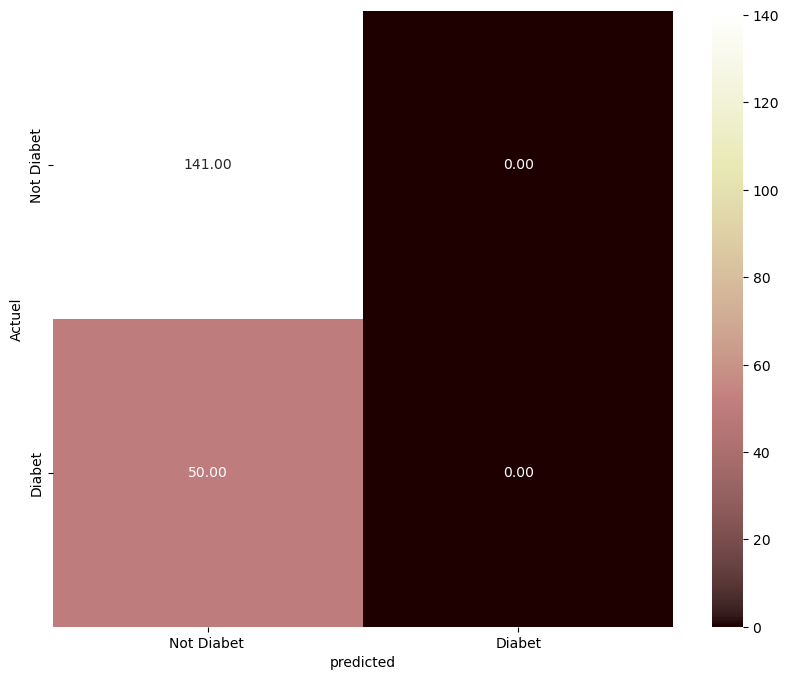

In [124]:
metrics_score(y_test,y_pred_test)

In [130]:
cols = X.columns
coef_lg = model_lgr.coef_
coefs =pd.DataFrame(coef_lg ,columns = cols).T.sort_values(by = 0, ascending = False)
coefs

,0
DiabetesPedigreeFunction,1.262613
Pregnancies,0.135822
BMI,0.100253
Glucose,0.042351
Age,0.029145
SkinThickness,0.003535
Insulin,-0.002344
BloodPressure,-0.013354


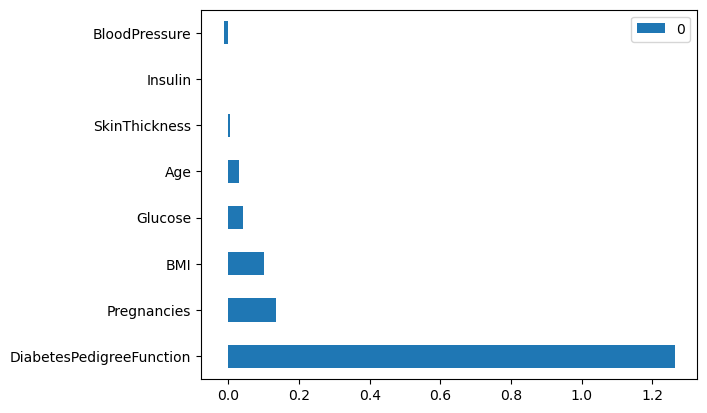

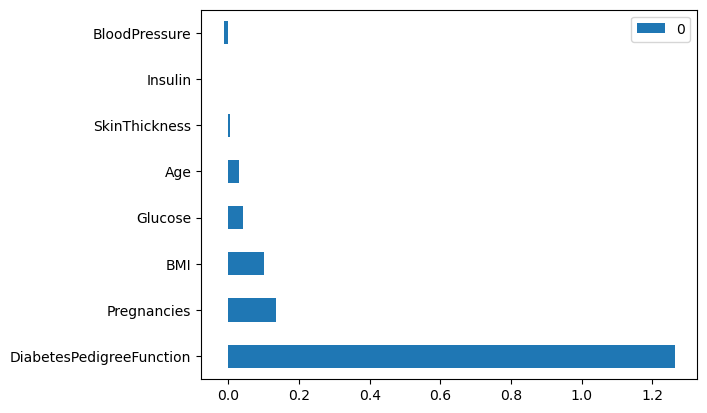

In [136]:
coefs.plot.barh()
plt.show()


In [160]:
# fiding the odds
odds = np.exp(model_lgr.coef_[0])
# Adding the odds to DataFrame and  sorting  the values
df_odds = pd.DataFrame(odds, X_train_Scaled .columns, columns = ['odds']).sort_values(by= 'odds', ascending = False)
df_odds

,odds
DiabetesPedigreeFunction,3.534646
Pregnancies,1.145478
BMI,1.105451
Glucose,1.043260
Age,1.029574
SkinThickness,1.003541
Insulin,0.997659
BloodPressure,0.986735


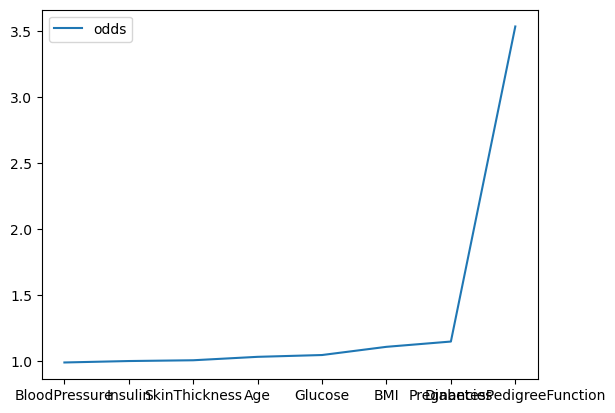

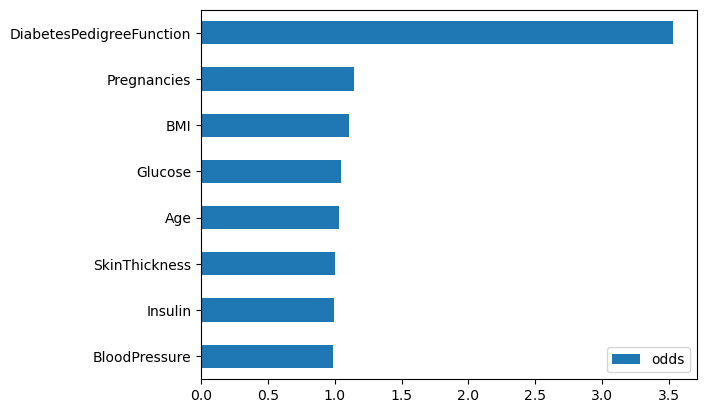

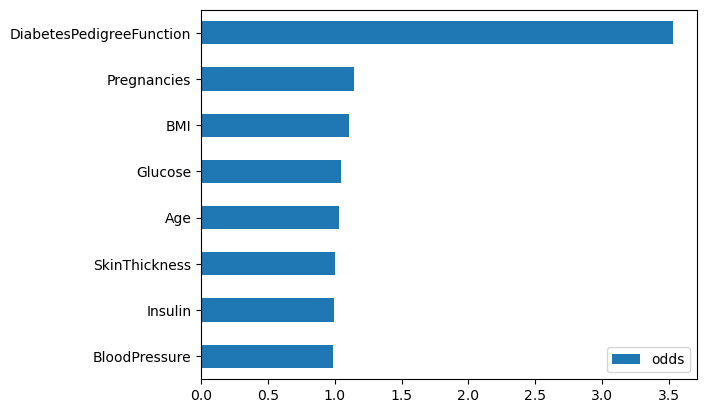

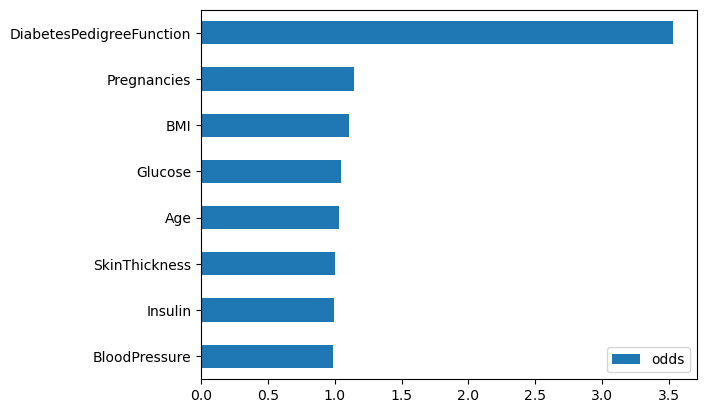

In [159]:
df_odds.plot.barh()
plt.show()

In [161]:
# predict_proba  gives  the probability  of each observation beloinging  to each class
y_score_lg =model_lgr.predict_proba(X_train_Scaled)
precisions_lg , recalls_lg , thresholds_lg = metrics.precision_recall_curve(y_train,y_score_lg[:,1])

In [1]:
pip install streamlit-jupyter


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.4 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 931.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 931.2 kB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.2 MB 853.0 kB/s eta 0:00:02
   ----------------------- ---------------- 1.3/2.2 MB 932.1 kB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 911.5 kB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 911.5 kB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 915.0 kB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 889.5 kB/s eta 0:00:01
   ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from streamlit_jupyter import StreamlitPatcher
StreamlitPatcher().jupyter()
import streamlit as st


In [3]:
st.title('Diabets Logistic Regression')

# Diabets Logistic Regression